# 3D Bin packing

Given the array of the 3d boxes (blocks) and the bin size (width, height and depth) find the minimum number of bins to fit all the given boxes.

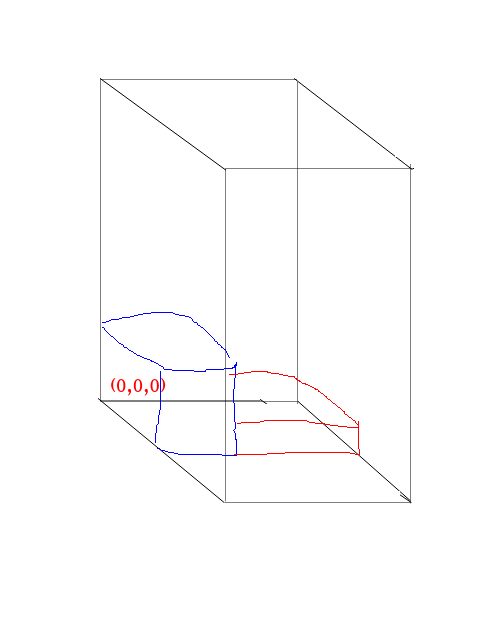

### Placement strategies

see https://eprints.nottingham.ac.uk/12779/1/thesis_nicer.pdf page 42

1. Deepest-bottom-leftmost (DBL) - place box at the deepest most left position possible
2. Maximum contact (MC) - maximize the contact with other boxes
3. Smallest extrusion (SE) - like DBL but position is better if box extrudes less to z-axis
4. Neighbour score (NS) - place box so that as many boxes touched by new box are lower or equal on z-axis

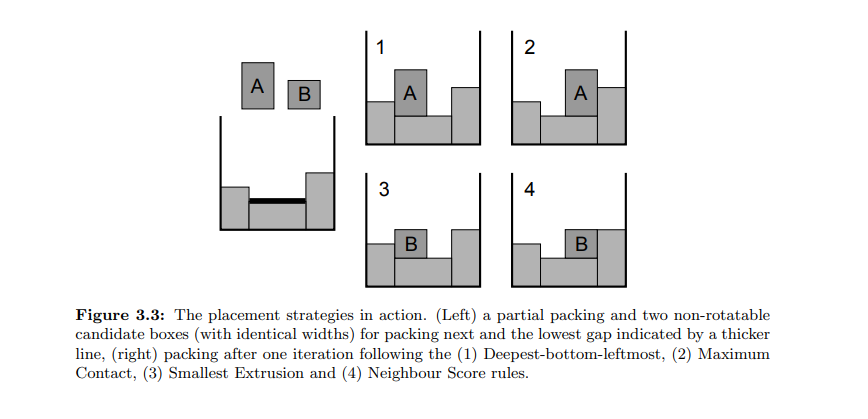

With given strategies we can create fitness functions for metaheuristics.

### Rules

Rules for bin:
- Bin must be packed from the top
- Nothing cant stick outside the bin


Different rules for boxes positioning:
- boxes must be placed in the given orientation (FIXED_BOX)
- top side of the box must be fixed, box can be rotated around z-axis (FIXED_TOP)
- box can be rotated any way (FREE_BOX)

### Brute force algorithm 

1. FIXED_BOX
    - Create all permutation of boxes
    - For each permutation _p_ of boxes:
        - Place permutation _p_ using desired placing startegy
        - Evaluate permutation _p_ 
    - Select the best evaluated permutation

Example:

Boxes: [1,2,3] 

Permutations: [1,2,3], [1,3,2], [2,1,3], [2,3,1], [3,1,2], [3,2,1]

Evaluate each permutation and check the best solution.

2. FIXED_TOP and FREE_BOX
    - Create all permutation of boxes
    - For each permutation _p_ of boxes:
        - For each permutation _r_ of possible rotations for each box:
            - Rotate each box in _p_ with rotation from _r_
            - Place permutation _p_ using desired placing startegy
            - Evaluate permutation _p_ 
    - Select the best evaluated permutation

Boxes: [1,2,3] 

Permutations: [1,2,3], [1,3,2], [2,1,3], [2,3,1], [3,1,2], [3,2,1]

Rotations:[r1,r2] (r1- starting position, r2- rotatet 90deg around z-axis)

Permutations of rotations for each box: [r1,r1,r1], [r1,r1,r2], [r1,r2,r1], [r1,r2,r2], [r2,r1,r1], [r2,r1,r2], [r2,r2,r1], [r2,r2,r2]

Evaluate each permutation for each rotation and check the best solution.

https://www.mdpi.com/2227-9717/11/7/1909

In [29]:
from itertools import permutations
from typing import List, Tuple

In [30]:
from box import Box

In [31]:
b = Box(2,3,5)
b

Box(w=2, d=3, h=5, pos=None)

In [32]:
from bin import Bin

In [33]:
def pack_boxes_into_bins(boxes:List[Box], bin_size:Tuple[int, int, int], strategy="DBL"):
    """
    Put all boxes in bins using the specified placement strategy.
    """
    bins = []
    for box in boxes:
        # Try to place the box in an existing bin
        placed = False
        for bin in bins:
            if bin.add_box(box, strategy):
                placed = True
                break
        # If the box doesn't fit in any existing bin, create a new bin
        if not placed:
            new_bin = Bin(*bin_size)
            new_bin.add_box(box, strategy)
            bins.append(new_bin)
    return bins

In [34]:
from binplot import plot_bins
from copy import deepcopy

In [35]:
from time import sleep
from IPython.display import clear_output

def pack_boxes_into_bins_interactive(boxes, bin_size):
    """
    Put all boxes in bins in the given order, visualizing the process interactively.
    """
    bins = []
    for i, box in enumerate(boxes):
        placed = False
        for bin in bins:
            if bin.add_box(box):
                placed = True
                break
        if not placed:
            new_bin = Bin(*bin_size)
            new_bin.add_box(box)
            bins.append(new_bin)

        # Visualize after each box is placed
        clear_output(wait=True)
        print(f"Placing box {i + 1}/{len(boxes)}...")
        plot_bins(bins)
        sleep(1)  # Pause for a moment to make the visualization interactive

    return bins

In [60]:
def brute_force(boxes, bin_size, interactive=False):
    best_solution = None
    for p in permutations(boxes):
        p_copy = [deepcopy(box) for box in p]
        sol = pack_boxes_into_bins_interactive(p_copy,bin_size) if interactive else pack_boxes_into_bins(p_copy,bin_size)
        if best_solution is None or len(sol) < len(best_solution):
            best_solution = sol 
    return best_solution

In [61]:
boxes = [
    Box(1, 1, 1),
    Box(1, 1, 1),
    Box(1, 1, 1),
    Box(3, 3, 1),
    Box(3, 3, 1),
]

bin_size = (3, 3, 3)
bins = brute_force(boxes, bin_size, interactive=False)

plot_bins(bins)

print(f"Number of bins used: {len(bins)}")
for i, bin in enumerate(bins, 1):
    print(f"Bin {i}: {bin}")



Number of bins used: 1
Bin 1: Bin(w=3, d=3, h=3, boxes=[Box(w=3, d=3, h=1, pos=(0, 0, 0)), Box(w=3, d=3, h=1, pos=(0, 0, 1)), Box(w=1, d=1, h=1, pos=(0, 0, 2)), Box(w=1, d=1, h=1, pos=(1, 0, 2)), Box(w=1, d=1, h=1, pos=(2, 0, 2))])


In [25]:
# Example setup
boxes = [
    Box(2, 2, 2),
    Box(3, 3, 1),
    Box(1, 1, 3),
    Box(2, 1, 1),
]
bin_size = (5, 5, 5)

# Deepest-bottom-leftmost (DBL)
print("=== Deepest-Bottom-Leftmost (DBL) ===")
bins_dbl = pack_boxes_into_bins(boxes, bin_size, strategy="DBL")
plot_bins(bins_dbl)
for i, bin in enumerate(bins_dbl):
    print(f"Bin {i+1}: {bin}")

# Maximum Contact (MC)
print("\n=== Maximum Contact (MC) ===")
bins_mc = pack_boxes_into_bins(boxes, bin_size, strategy="MC")
plot_bins(bins_mc)
for i, bin in enumerate(bins_mc):
    print(f"Bin {i+1}: {bin}")

# Smallest Extrusion (SE)
print("\n=== Smallest Extrusion (SE) ===")
bins_se = pack_boxes_into_bins(boxes, bin_size, strategy="SE")
plot_bins(bins_se)
for i, bin in enumerate(bins_se):
    print(f"Bin {i+1}: {bin}")

# Neighbour Score (NS)
print("\n=== Neighbour Score (NS) ===")
bins_ns = pack_boxes_into_bins(boxes, bin_size, strategy="NS")
plot_bins(bins_ns)
for i, bin in enumerate(bins_ns):
    print(f"Bin {i+1}: {bin}")


=== Deepest-Bottom-Leftmost (DBL) ===


Bin 1: Bin(w=5, d=5, h=5, boxes=[Box(w=2, d=2, h=2, pos=(0, 0, 0)), Box(w=3, d=3, h=1, pos=(2, 0, 0)), Box(w=1, d=1, h=3, pos=(0, 2, 0)), Box(w=2, d=1, h=1, pos=(0, 3, 0))])

=== Maximum Contact (MC) ===


Bin 1: Bin(w=5, d=5, h=5, boxes=[Box(w=2, d=2, h=2, pos=(0, 0, 0)), Box(w=3, d=3, h=1, pos=(0, 2, 0)), Box(w=1, d=1, h=3, pos=(0, 0, 2)), Box(w=2, d=1, h=1, pos=(0, 1, 2))])

=== Smallest Extrusion (SE) ===


Bin 1: Bin(w=5, d=5, h=5, boxes=[Box(w=2, d=2, h=2, pos=(0, 0, 0)), Box(w=3, d=3, h=1, pos=(0, 2, 0)), Box(w=1, d=1, h=3, pos=(2, 0, 0)), Box(w=2, d=1, h=1, pos=(2, 1, 0))])

=== Neighbour Score (NS) ===


Bin 1: Bin(w=5, d=5, h=5, boxes=[Box(w=2, d=2, h=2, pos=(0, 0, 0)), Box(w=3, d=3, h=1, pos=(0, 2, 0)), Box(w=1, d=1, h=3, pos=(0, 0, 2)), Box(w=2, d=1, h=1, pos=(0, 1, 2))])


In [38]:
from load_data import load_test_data
def execute_bin_packing(fnc: callable, file_path:str, loader: callable = load_test_data, plot_fnc: callable = plot_bins):
    bin_size, boxes = loader(file_path)
    bins = fnc(boxes, bin_size)
    plot_fnc(bins)

    print(f"Number of bins used: {len(bins)}")
    for i, bin in enumerate(bins, 1):
        print(f"Bin {i}: {bin}")

In [67]:
from load_data import load_test_data
import os
import re

def test_bin_packing(fnc: callable, folder_path: str, loader: callable = load_test_data):
    """
    For each file in the folder, run the bin packing function and compare the result to the expected number of bins.
    """
    total_executed = 0
    total_passed = 0
    for filename in sorted(os.listdir(folder_path)):
        if not filename.endswith('.txt'):
            continue
        file_path = os.path.join(folder_path, filename)
        # Read expected number of bins from file
        with open(file_path, 'r') as f:
            lines = f.readlines()
        expected_bins = None
        for line in lines:
            match = re.search(r'#Number of Bins:\s*(\d+)', line)
            if match:
                expected_bins = int(match.group(1))
                break
        if expected_bins is None:
            print(f"[{filename}] No expected bin count found. Skipping.")
            continue
        total_executed = total_executed + 1
        # Run bin packing
        bin_size, boxes = loader(file_path)
        bins = fnc(boxes, bin_size)
        actual_bins = len(bins)
        # Print test result
        print(f"Test: {filename}")
        print(f"Expected bins: {expected_bins}, Actual bins: {actual_bins}")
        print("Result:", "PASS" if actual_bins == expected_bins else "FAIL")
        print("-" * 40)
        if actual_bins == expected_bins:
            total_passed = total_passed + 1
    print(f"PASSED {total_passed} of {total_executed} tests")

In [39]:
execute_bin_packing(brute_force, "./data/example1.txt")

Number of bins used: 1
Bin 1: Bin(w=10, d=10, h=10, boxes=[Box(w=5, d=5, h=5, pos=(0, 0, 0)), Box(w=5, d=5, h=5, pos=(5, 0, 0)), Box(w=10, d=5, h=5, pos=(0, 5, 0))])


In [40]:
execute_bin_packing(brute_force, "./data/example2.txt")

Number of bins used: 1
Bin 1: Bin(w=20, d=20, h=10, boxes=[Box(w=10, d=10, h=5, pos=(0, 0, 0)), Box(w=10, d=10, h=5, pos=(10, 0, 0)), Box(w=5, d=5, h=10, pos=(0, 10, 0)), Box(w=5, d=5, h=10, pos=(5, 10, 0)), Box(w=10, d=10, h=10, pos=(10, 10, 0))])


In [41]:
execute_bin_packing(brute_force, "./data/example3.txt")

Number of bins used: 2
Bin 1: Bin(w=5, d=5, h=5, boxes=[Box(w=5, d=5, h=5, pos=(0, 0, 0))])
Bin 2: Bin(w=5, d=5, h=5, boxes=[Box(w=5, d=5, h=5, pos=(0, 0, 0))])


In [42]:
execute_bin_packing(brute_force, "./data/example4.txt")

Number of bins used: 1
Bin 1: Bin(w=15, d=15, h=15, boxes=[Box(w=5, d=5, h=5, pos=(0, 0, 0)), Box(w=10, d=5, h=5, pos=(5, 0, 0)), Box(w=5, d=10, h=5, pos=(0, 5, 0)), Box(w=15, d=5, h=5, pos=(0, 0, 5))])


In [43]:
execute_bin_packing(brute_force, "./data/example5.txt")

Number of bins used: 2
Bin 1: Bin(w=30, d=30, h=30, boxes=[Box(w=20, d=20, h=20, pos=(0, 0, 0)), Box(w=10, d=10, h=10, pos=(20, 0, 0)), Box(w=10, d=10, h=10, pos=(20, 10, 0)), Box(w=5, d=5, h=5, pos=(0, 20, 0)), Box(w=5, d=5, h=5, pos=(5, 20, 0))])
Bin 2: Bin(w=30, d=30, h=30, boxes=[Box(w=30, d=20, h=20, pos=(0, 0, 0))])


In [44]:
execute_bin_packing(brute_force, "./data/example6.txt")

Number of bins used: 2
Bin 1: Bin(w=10, d=10, h=10, boxes=[Box(w=10, d=10, h=2, pos=(0, 0, 0)), Box(w=10, d=10, h=2, pos=(0, 0, 2)), Box(w=10, d=10, h=6, pos=(0, 0, 4))])
Bin 2: Bin(w=10, d=10, h=10, boxes=[Box(w=10, d=5, h=10, pos=(0, 0, 0)), Box(w=6, d=5, h=10, pos=(0, 5, 0)), Box(w=4, d=5, h=5, pos=(6, 5, 0)), Box(w=4, d=5, h=3, pos=(6, 5, 5)), Box(w=4, d=5, h=2, pos=(6, 5, 8))])


### Data generation

noob:
```
num_examples = 30
num_bins_range = (1,2)
size_range = (2,4)
max_boxes_range = (2,3)
```

easy:

```
num_examples = 30
num_bins_range = (1,2)
size_range = (5,10)
max_boxes_range = (2,3)
```

moderate:

```
num_examples = 30
num_bins_range = (3,4)
size_range = (5,10)
max_boxes_range = (2,4)
```

medium:

```
num_examples = 30
num_bins_range = (5,20)
size_range = (5,30)
max_boxes_range = (2,30)
```

hard:

```
num_examples = 30
num_bins_range = (20,200)
size_range = (30,300)
max_boxes_range = (2,1000)
```

In [82]:
from splitter import split_bin_randomly, Box, write_boxes_to_file
import random

def genearte_example(num_bins :int = 10, w :int = 10, d:int = 10, h:int =10, max_boxes:int = 5, filename :str = "./data/example_data.txt"):
    all_boxes = []

    for i in range(num_bins):
        boxes = split_bin_randomly(w, d, h, max_boxes)
        all_boxes.extend(boxes)

    random.shuffle(all_boxes)  # Shuffle boxes to randomize their order
    write_boxes_to_file(filename, (w, d, h), all_boxes, num_bins)

num_examples = 30
num_bins_range = (3,3)
size_range = (7,13)
max_boxes_range = (3,3)

for ex in range(num_examples):
    num_bins = random.randint(num_bins_range[0], num_bins_range[1])
    w = random.randint(size_range[0], size_range[1])
    h = random.randint(size_range[0], size_range[1])
    d = random.randint(size_range[0], size_range[1])
    max_boxes = random.randint(max_boxes_range[0], max_boxes_range[1])
    genearte_example(num_bins=num_bins, w=w, h=h, d=d,max_boxes=max_boxes, filename=f"./data/moderate/bins_generated_{ex}.txt")


In [39]:
import random
from typing import List, Tuple
import plotly.graph_objects as go
from bin import Bin
from box import Box


def random_partition(n, num_parts):
    """Split integer n into num_parts positive integers randomly."""
    if num_parts == 1:
        return [n]
    cuts = sorted(random.sample(range(1, n), k=num_parts - 1))
    return [b - a for a, b in zip([0] + cuts, cuts + [n])]

def try_split(box: Box, position, axis, max_splits=3):
    """Attempt to split a box along the given axis into 2 or 3 pieces."""
    w, d, h = box.width, box.depth, box.height
    x, y, z = position
    new_boxes = []

    if axis == 'x' and w > 1:
        num_parts = random.randint(2, min(3, max_splits))
        cuts = random_partition(w, num_parts)
        offset = x
        for cw in cuts:
            new_box = Box(cw, d, h)
            new_boxes.append(((offset, y, z), new_box))
            offset += cw

    elif axis == 'y' and d > 1:
        num_parts = random.randint(2, min(3, max_splits))
        cuts = random_partition(d, num_parts)
        offset = y
        for cd in cuts:
            new_box = Box(w, cd, h)
            new_boxes.append(((x, offset, z), new_box))
            offset += cd

    elif axis == 'z' and h > 1:
        num_parts = random.randint(2, min(3, max_splits))
        cuts = random_partition(h, num_parts)
        offset = z
        for ch in cuts:
            new_box = Box(w, d, ch)
            new_boxes.append(((x, y, offset), new_box))
            offset += ch

    return new_boxes if new_boxes else None

def split_bin_limited(bin: Bin, max_pieces: int = 6):
    """Split a bin into up to max_pieces boxes randomly (1 to max_pieces)."""
    target_pieces = random.randint(1, max_pieces)

    box_queue = [((0, 0, 0), Box(bin.width, bin.depth, bin.height))]
    result = []

    while len(result) + len(box_queue) < target_pieces and box_queue:
        pos, box = box_queue.pop(0)
        axis = random.choice(['x', 'y', 'z'])
        remaining_splits = target_pieces - len(result) - len(box_queue)
        new_boxes = try_split(box, pos, axis, max_splits=min(3, remaining_splits + 1))

        if new_boxes:
            box_queue.extend(new_boxes)
        else:
            box.position = pos
            result.append(box)

    for pos, box in box_queue:
        box.position = pos
        result.append(box)

    bin.boxes = result

# --- Plotting ---

def visualize_bin(bin: Bin):
    fig = go.Figure()

    colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'yellow', 'pink']

    for i, box in enumerate(bin.boxes):
        x, y, z = box.position
        fig.add_trace(go.Mesh3d(
            x=[x, x+box.width, x+box.width, x, x, x+box.width, x+box.width, x],
            y=[y, y, y+box.depth, y+box.depth, y, y, y+box.depth, y+box.depth],
            z=[z, z, z, z, z+box.height, z+box.height, z+box.height, z+box.height],
            color=colors[i % len(colors)],
            opacity=0.5,
            alphahull=0
        ))

    fig.update_layout(scene=dict(
        xaxis_title='Width',
        yaxis_title='Depth',
        zaxis_title='Height',
    ))
    fig.show()

# --- Run Example ---

if __name__ == "__main__":
    # Randomize original bin size between 5 and 10 for each dimension
    bin_width = random.randint(5, 10)
    bin_depth = random.randint(5, 10)
    bin_height = random.randint(5, 10)

    my_bin = Bin(bin_width, bin_depth, bin_height)

    split_bin_limited(my_bin, max_pieces=6)
    for b in my_bin.boxes:
        print(b)
    
    visualize_bin(my_bin)

Box(w=9, d=7, h=5, pos=(0, 0, 0))
Box(w=9, d=7, h=4, pos=(0, 0, 5))


In [ ]:
# Example setup
boxes = [
    Box(2, 2, 2),
    Box(3, 3, 1),
    Box(1, 1, 3),
    Box(2, 1, 1),
]
bin_size = (5, 5, 5)

# Deepest-bottom-leftmost (DBL)
print("=== Deepest-Bottom-Leftmost (DBL) ===")
bins_dbl = pack_boxes_into_bins(boxes, bin_size, strategy="DBL")
plot_bins(bins_dbl)
for i, bin in enumerate(bins_dbl):
    print(f"Bin {i+1}: {bin}")

# Maximum Contact (MC)
print("\n=== Maximum Contact (MC) ===")
bins_mc = pack_boxes_into_bins(boxes, bin_size, strategy="MC")
plot_bins(bins_mc)
for i, bin in enumerate(bins_mc):
    print(f"Bin {i+1}: {bin}")

# Smallest Extrusion (SE)
print("\n=== Smallest Extrusion (SE) ===")
bins_se = pack_boxes_into_bins(boxes, bin_size, strategy="SE")
plot_bins(bins_se)
for i, bin in enumerate(bins_se):
    print(f"Bin {i+1}: {bin}")

# Neighbour Score (NS)
print("\n=== Neighbour Score (NS) ===")
bins_ns = pack_boxes_into_bins(boxes, bin_size, strategy="NS")
plot_bins(bins_ns)
for i, bin in enumerate(bins_ns):
    print(f"Bin {i+1}: {bin}")


=== Deepest-Bottom-Leftmost (DBL) ===


Bin 1: Bin(w=5, d=5, h=5, boxes=[Box(w=2, d=2, h=2, pos=(0, 0, 0)), Box(w=3, d=3, h=1, pos=(2, 0, 0)), Box(w=1, d=1, h=3, pos=(0, 2, 0)), Box(w=2, d=1, h=1, pos=(0, 3, 0))])

=== Maximum Contact (MC) ===


Bin 1: Bin(w=5, d=5, h=5, boxes=[Box(w=2, d=2, h=2, pos=(0, 0, 0)), Box(w=3, d=3, h=1, pos=(0, 2, 0)), Box(w=1, d=1, h=3, pos=(0, 0, 2)), Box(w=2, d=1, h=1, pos=(0, 1, 2))])

=== Smallest Extrusion (SE) ===


Bin 1: Bin(w=5, d=5, h=5, boxes=[Box(w=2, d=2, h=2, pos=(0, 0, 0)), Box(w=3, d=3, h=1, pos=(0, 2, 0)), Box(w=1, d=1, h=3, pos=(2, 0, 0)), Box(w=2, d=1, h=1, pos=(2, 1, 0))])

=== Neighbour Score (NS) ===


Bin 1: Bin(w=5, d=5, h=5, boxes=[Box(w=2, d=2, h=2, pos=(0, 0, 0)), Box(w=3, d=3, h=1, pos=(0, 2, 0)), Box(w=1, d=1, h=3, pos=(0, 0, 2)), Box(w=2, d=1, h=1, pos=(0, 1, 2))])


In [68]:
test_bin_packing(brute_force,"./data/noob")

Test: bins_generated_0.txt
Expected bins: 1, Actual bins: 1
Result: PASS
----------------------------------------
Test: bins_generated_1.txt
Expected bins: 1, Actual bins: 1
Result: PASS
----------------------------------------
Test: bins_generated_10.txt
Expected bins: 1, Actual bins: 1
Result: PASS
----------------------------------------
Test: bins_generated_11.txt
Expected bins: 1, Actual bins: 1
Result: PASS
----------------------------------------
Test: bins_generated_12.txt
Expected bins: 1, Actual bins: 1
Result: PASS
----------------------------------------
Test: bins_generated_13.txt
Expected bins: 2, Actual bins: 2
Result: PASS
----------------------------------------
Test: bins_generated_14.txt
Expected bins: 2, Actual bins: 2
Result: PASS
----------------------------------------
Test: bins_generated_15.txt
Expected bins: 1, Actual bins: 1
Result: PASS
----------------------------------------
Test: bins_generated_16.txt
Expected bins: 2, Actual bins: 2
Result: PASS
--------

In [79]:
test_bin_packing(brute_force,"./data/easy")

Test: bins_generated_0.txt
Expected bins: 2, Actual bins: 2
Result: PASS
----------------------------------------
Test: bins_generated_1.txt
Expected bins: 2, Actual bins: 2
Result: PASS
----------------------------------------
Test: bins_generated_10.txt
Expected bins: 2, Actual bins: 2
Result: PASS
----------------------------------------
Test: bins_generated_11.txt
Expected bins: 1, Actual bins: 1
Result: PASS
----------------------------------------
Test: bins_generated_12.txt
Expected bins: 1, Actual bins: 1
Result: PASS
----------------------------------------
Test: bins_generated_13.txt
Expected bins: 2, Actual bins: 2
Result: PASS
----------------------------------------
Test: bins_generated_14.txt
Expected bins: 1, Actual bins: 1
Result: PASS
----------------------------------------
Test: bins_generated_15.txt
Expected bins: 2, Actual bins: 2
Result: PASS
----------------------------------------
Test: bins_generated_16.txt
Expected bins: 2, Actual bins: 2
Result: PASS
--------

In [ ]:
test_bin_packing(brute_force,"./data/moderate")